### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score
from scipy.spatial import distance


from sklearn.datasets import load_boston
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


Алгоритмы вычисления дистанции
braycurtis       -- the Bray-Curtis distance.
canberra         -- the Canberra distance.
chebyshev        -- the Chebyshev distance.
cityblock        -- the Manhattan distance.
correlation      -- the Correlation distance.
cosine           -- the Cosine distance.
euclidean        -- the Euclidean distance.
jensenshannon    -- the Jensen-Shannon distance.
mahalanobis      -- the Mahalanobis distance.
minkowski        -- the Minkowski distance.
seuclidean       -- the normalized Euclidean distance.
sqeuclidean      -- the squared Euclidean distance.
wminkowski       -- (deprecated) alias of `minkowski`.

Чтобы градиентный спуск "взлетел" на датасете Бостон, learning_rate был изменён на invscaling, loss на epsilon_insensitive. С текущим весом эпсилона градиентный спуск проходит все указанные шаги, т.к. хвост распределения остаётся неустойчивым. При уменьшении epsilon до $10^-2$ завершается примерно на 3800 итерации, коэффициент $R^2$ равен 0.55, а MSE возрастает до 50.

Text(0.5, 1.0, 'Эволюция ошибки градиентного спуска.\nМаксимальное значение R^2: 0.64\nМинимальное значение MSE: 37.79')

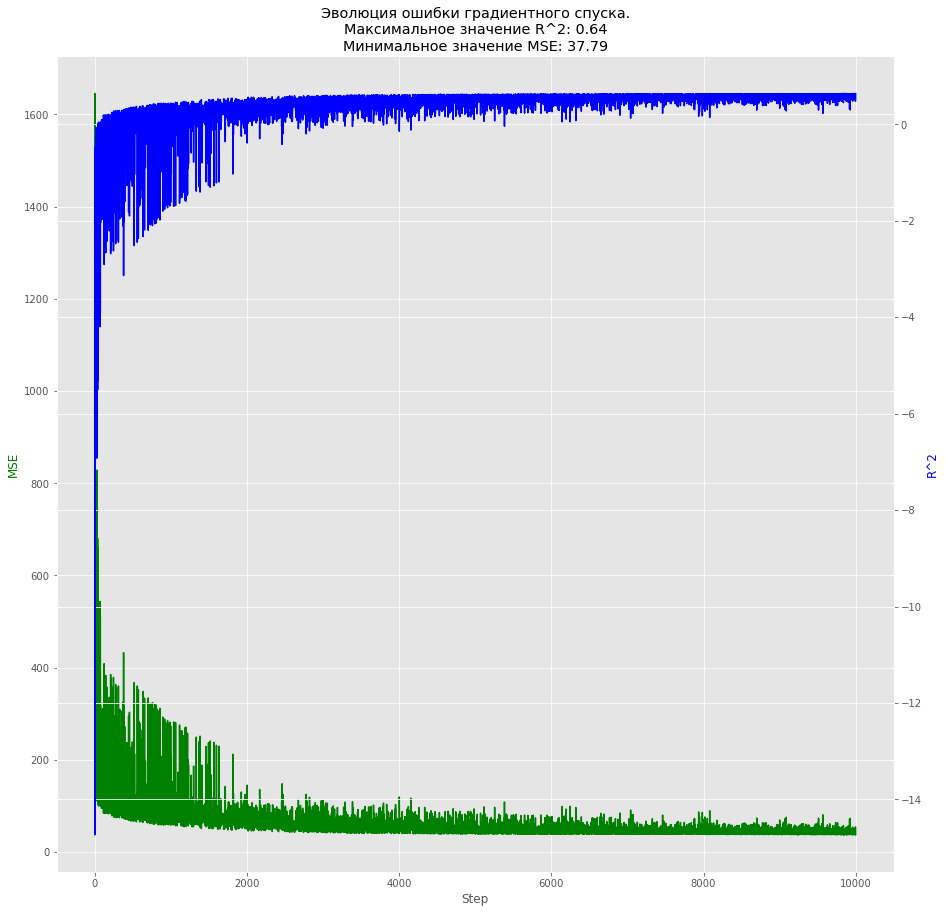

In [153]:
sgd_regressor = SGDRegressor(learning_rate='invscaling', eta0=0.001, fit_intercept=False, loss='epsilon_insensitive', 
                             random_state=42)
w_current, epsilon = np.random.random(X.shape[1]), 0.001
weight_evolution, mse_evolution, r2_evolution = [], [], [] # изменения весов и ошибка на валидации

for step in list(range(10000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        print("Итерации остановлены на шаге %d" % step); break
    mse_evolution.append(mean_squared_error(y_test, sgd_regressor.predict(X_test)))
    r2_evolution.append(r2_score(y_test, sgd_regressor.predict(X_test))) 
    w_current = sgd_regressor.coef_.copy()



fig, ax1 = plt.subplots(figsize=(15,15))
ax2 = ax1.twinx()
ax1.plot(range(len(mse_evolution)), mse_evolution, 'g-')
ax2.plot(range(len(r2_evolution)), r2_evolution, 'b-')

ax1.set_xlabel('Step')
ax1.set_ylabel('MSE', color='g')
ax2.set_ylabel('R^2', color='b')
plt.title(f'Эволюция ошибки градиентного спуска.\nМаксимальное значение R^2: {round(max(r2_evolution), 2)}\n'
            f'Минимальное значение MSE: {round(min(mse_evolution), 2)}')

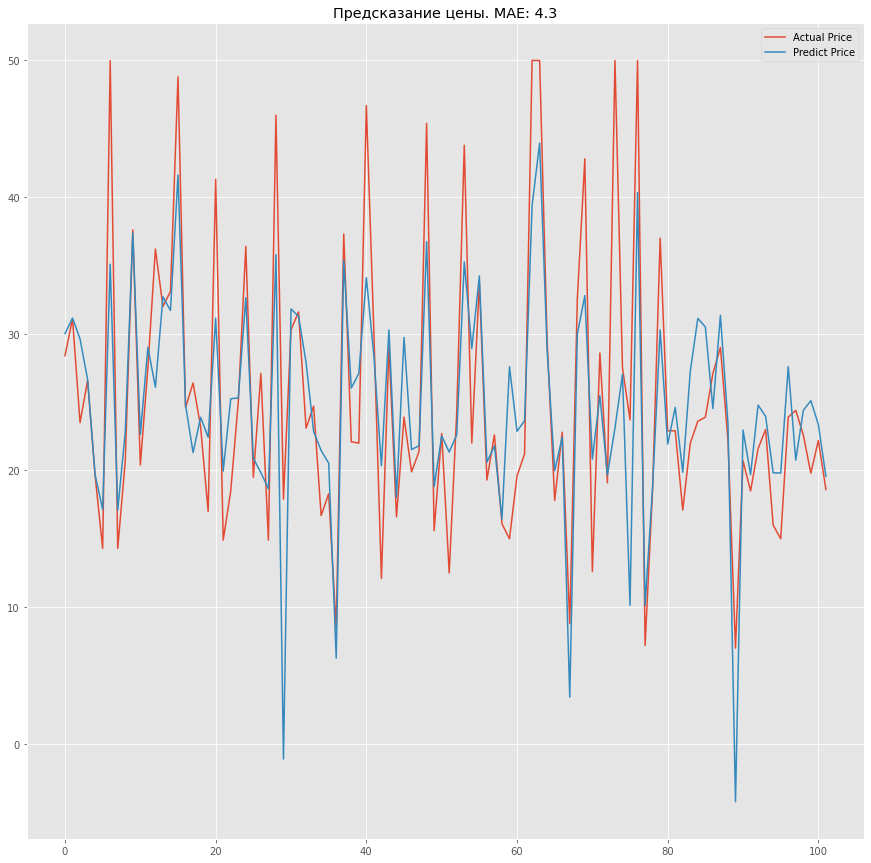

In [165]:
plt.figure(figsize=(15,15))
mae = round(mean_absolute_error(y_test, sgd_regressor.predict(X_test)), 2)
plt.plot(y_test, label='Actual Price')
plt.plot(sgd_regressor.predict(X_test), label='Predict Price')
plt.title(f'Предсказание цены. MAE: {mae}')
plt.legend()

Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.